<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/Edulearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Exploratória

#Importando as bibliotecas

In [ ]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats

#1. Dados Gerais

# Evolução de alunos matriculados

Inserindo um dataframe com os dados de alunos com deficiência, alunos totais nos últimos censos
(explicar de onde vem os dados, fonte)

In [ ]:
#Criando um dicionário, onde cada chave representa uma coluna
dados_gerais = {
'ANO': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
'ALUNO_COM_DEFICIENCIA': [25205, 29033, 34656, 37796, 45088, 51685, 49813, 52542, 59496, 66750],
'ALUNO_TOTAL': [8337219, 8961724, 9565483, 9929289, 8081369, 11187296, 11449222, 11589194, 12043993, 16425302],
'POPULACAO_TOTAL': [194890682, 196603732, 198314934, 200004188, 201717541, 203475683, 205156587, 206804741, 208494900,210147122]
}
#Criando o dataframe
df_dados_gerais = pd.DataFrame(dados_gerais, columns=['ANO','ALUNO_COM_DEFICIENCIA','ALUNO_TOTAL','POPULACAO_TOTAL'])
df_dados_gerais

,ANO,ALUNO_COM_DEFICIENCIA,ALUNO_TOTAL,POPULACAO_TOTAL
0,2010,25205,8337219,194890682
1,2011,29033,8961724,196603732
2,2012,34656,9565483,198314934
3,2013,37796,9929289,200004188
4,2014,45088,8081369,201717541
5,2015,51685,11187296,203475683
6,2016,49813,11449222,205156587
7,2017,52542,11589194,206804741
8,2018,59496,12043993,208494900
9,2019,66750,16425302,210147122


In [ ]:
#Inserindo uma coluna com a porcentagem para saber a proporção dos alunos com deficiência em relação ao total de alunos
df_dados_gerais['PORCENTAGEM'] = df_dados_gerais['ALUNO_COM_DEFICIENCIA'] / df_dados_gerais['ALUNO_TOTAL'] * 100
df_dados_gerais

,ANO,ALUNO_COM_DEFICIENCIA,ALUNO_TOTAL,POPULACAO_TOTAL,PORCENTAGEM
0,2010,25205,8337219,194890682,0.302319
1,2011,29033,8961724,196603732,0.323967
2,2012,34656,9565483,198314934,0.362303
3,2013,37796,9929289,200004188,0.380652
4,2014,45088,8081369,201717541,0.557925
5,2015,51685,11187296,203475683,0.461997
6,2016,49813,11449222,205156587,0.435078
7,2017,52542,11589194,206804741,0.453371
8,2018,59496,12043993,208494900,0.493989
9,2019,66750,16425302,210147122,0.406385


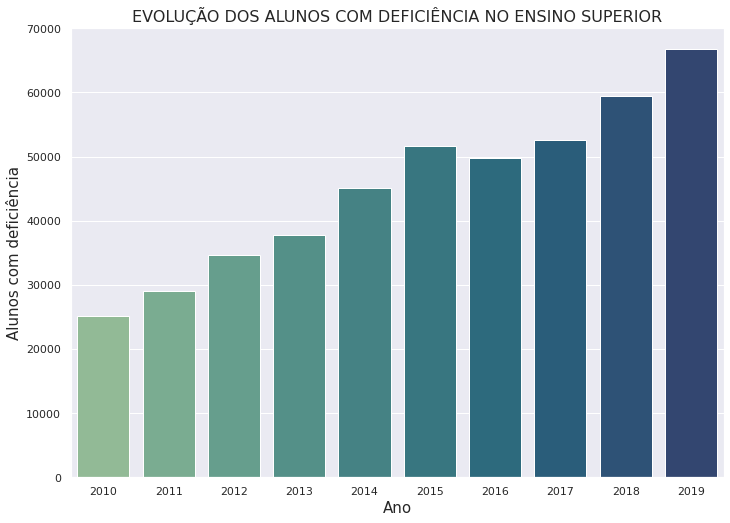

In [ ]:
#Gráfico de evolução de alunos com deficiência no ensino superior
sns.set(rc={'figure.figsize':(11.7,8.27)})
evolucao_alunoscomdeficiencia = sns.barplot(data=df_dados_gerais, x='ANO', y='ALUNO_COM_DEFICIENCIA', palette='crest')
plt.title("EVOLUÇÃO DOS ALUNOS COM DEFICIÊNCIA NO ENSINO SUPERIOR", loc="center", fontsize=16)
plt.xlabel('Ano', fontsize=15), plt.ylabel('Alunos com deficiência', fontsize=15)
plt.savefig('evolucao_alunoscomdeficiencia.png', transparent = True)

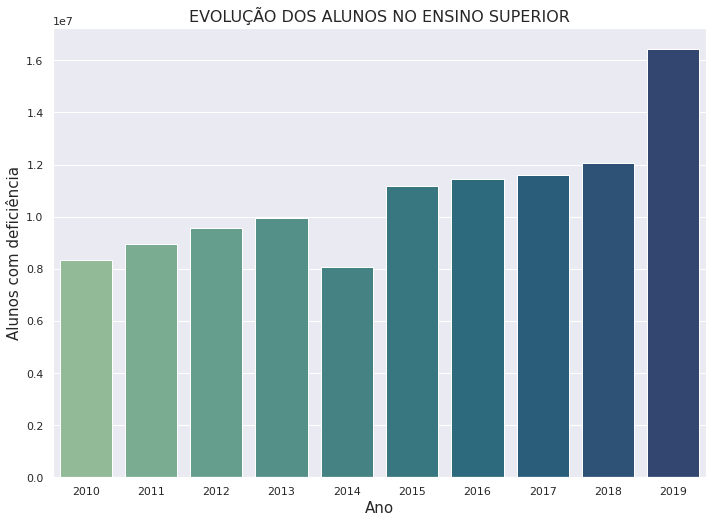

In [ ]:
#Gráfico de evolução de alunos com deficiência comparado ao total de alunos
sns.set(rc={'figure.figsize':(11.7,8.27)})
evolucao_alunos = sns.barplot(data=df_dados_gerais, x='ANO', y='ALUNO_TOTAL', palette='crest')
plt.title("EVOLUÇÃO DOS ALUNOS NO ENSINO SUPERIOR", loc="center", fontsize=16)
plt.xlabel('Ano', fontsize=15), plt.ylabel('Alunos com deficiência', fontsize=15)
plt.savefig('evolucao_alunos.png', transparent = True)

In [ ]:
#Inserindo um percentual de evolução anual no dataframe
df_dados_gerais['VALOR_INICIAL'] = df_dados_gerais['ALUNO_COM_DEFICIENCIA'].shift()
df_dados_gerais['VALOR_FINAL'] = df_dados_gerais['ALUNO_COM_DEFICIENCIA']
df_dados_gerais['EVOLUCAO_ANUAL'] = (df_dados_gerais['VALOR_FINAL'] - df_dados_gerais['VALOR_INICIAL']) * 100/ df_dados_gerais['VALOR_INICIAL']
df_dados_gerais

,ANO,ALUNO_COM_DEFICIENCIA,ALUNO_TOTAL,POPULACAO_TOTAL,PORCENTAGEM,VALOR_INICIAL,VALOR_FINAL,EVOLUCAO_ANUAL
0,2010,25205,8337219,194890682,0.302319,NaN,25205,NaN
1,2011,29033,8961724,196603732,0.323967,25205.0,29033,15.187463
2,2012,34656,9565483,198314934,0.362303,29033.0,34656,19.367616
3,2013,37796,9929289,200004188,0.380652,34656.0,37796,9.060480
4,2014,45088,8081369,201717541,0.557925,37796.0,45088,19.293047
5,2015,51685,11187296,203475683,0.461997,45088.0,51685,14.631388
6,2016,49813,11449222,205156587,0.435078,51685.0,49813,-3.621941
7,2017,52542,11589194,206804741,0.453371,49813.0,52542,5.478490
8,2018,59496,12043993,208494900,0.493989,52542.0,59496,13.235126
9,2019,66750,16425302,210147122,0.406385,59496.0,66750,12.192416


In [ ]:
#Tipos de dados do dataframe
df_dados_gerais.dtypes

ANO                        int64
ALUNO_COM_DEFICIENCIA      int64
ALUNO_TOTAL                int64
POPULACAO_TOTAL            int64
PORCENTAGEM              float64
VALOR_INICIAL            float64
VALOR_FINAL                int64
EVOLUCAO_ANUAL           float64
dtype: object

In [ ]:
#Explorando dados estatísticos do dataframe
df_dados_gerais.describe()

,ANO,ALUNO_COM_DEFICIENCIA,ALUNO_TOTAL,POPULACAO_TOTAL,PORCENTAGEM,VALOR_INICIAL,VALOR_FINAL,EVOLUCAO_ANUAL
count,10.00000,10.000000,1.000000e+01,1.000000e+01,10.000000,9.000000,10.000000,9.000000
mean,2014.50000,45206.400000,1.075701e+07,2.025610e+08,0.417798,42812.666667,45206.400000,11.647121
std,3.02765,13388.209051,2.437782e+06,5.141812e+06,0.078661,11712.711791,13388.209051,7.247518
min,2010.00000,25205.000000,8.081369e+06,1.948907e+08,0.302319,25205.000000,25205.000000,-3.621941
25%,2012.25000,35441.000000,9.112664e+06,1.987372e+08,0.366890,34656.000000,35441.000000,9.060480
50%,2014.50000,47450.500000,1.055829e+07,2.025966e+08,0.420731,45088.000000,47450.500000,13.235126
75%,2016.75000,52327.750000,1.155420e+07,2.063927e+08,0.459841,51685.000000,52327.750000,15.187463
max,2019.00000,66750.000000,1.642530e+07,2.101471e+08,0.557925,59496.000000,66750.000000,19.367616


<Figure size 504x288 with 0 Axes>

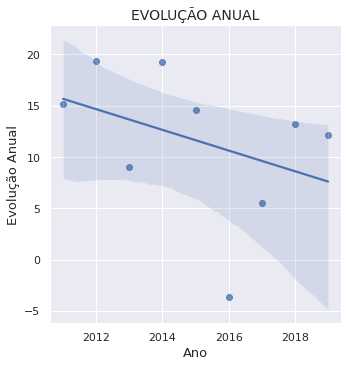

In [ ]:
#Visualizando a evolução com um LinePlot
plt.figure(figsize =(7, 4))
sns.lmplot(x='ANO',y='EVOLUCAO_ANUAL',data=df_dados_gerais)
plt.title("EVOLUÇÃO ANUAL", loc="center", fontsize=14)
plt.xlabel('Ano', fontsize=13), plt.ylabel('Evolução Anual', fontsize=13)
plt.savefig('evolucao_anual.png', transparent = True)

#Proporções de pessoas com deficiência no Brasil e no ensino superior

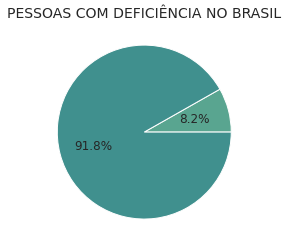

In [ ]:
plt.figure(figsize = (5,4))
brasil = [17258000,(210147125-17258000)]
colors = sns.color_palette("crest")[1:]
brasil = plt.pie(brasil, colors=colors,autopct='%.1f%%')
plt.title("PESSOAS COM DEFICIÊNCIA NO BRASIL", loc="center", fontsize=14)
plt.savefig('pessoas_brasil.png', transparent = True)

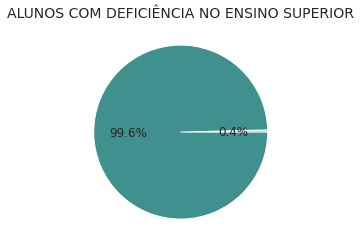

In [ ]:
plt.figure(figsize = (5,4))
brasil = [66750,(16525302-66750)]
colors = sns.color_palette("crest")[1:]
plt.pie(brasil, colors=colors, autopct='%.1f%%')
plt.title("ALUNOS COM DEFICIÊNCIA NO ENSINO SUPERIOR", loc="center", fontsize=14)
plt.savefig('alunos_ensino_superior.png', transparent = True)

#2. Dados do Censo do Ensino Superior (INEP)

#2.1 Censo 2019 - IES

In [ ]:
#Carregando os dados das IES
url_censo_ies_2019 = 'https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_IES_2019.CSV'
df_ies = pd.read_csv(url_censo_ies_2019, sep='|', encoding='latin-1', usecols=['CO_IES','NO_IES','SG_IES','TP_CATEGORIA_ADMINISTRATIVA','TP_ORGANIZACAO_ACADEMICA','CO_REGIAO','CO_UF'])
df_ies.head()

,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_REGIAO,CO_UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,51
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,53
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,28
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,13
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,31


In [ ]:
#Renomeando as colunas
df_ies = df_ies.rename(columns={
    'CO_IES':'CODIGO_IES',
    'NO_IES':'NOME_IES',
    'SG_IES':'SIGLA_IES',
    'TP_CATEGORIA_ADMINISTRATIVA':'TIPO_CATEGORIA_ADM',
    'TP_ORGANIZACAO_ACADEMICA':'TIPO_ORG_ACADEMICA',
    'CO_REGIAO':'REGIAO',
    'CO_UF':'UF'
    })
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,51
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,53
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,28
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,13
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,31


In [ ]:
#Substituindo o código pelo nome das unidades federativas
uf = {
    '11':'Rondônia',
    '12':'Acre',
    '13':'Amazonas',
    '14':'Roraima',
    '15':'Pará',
    '16':'Amapá',
    '17':'Tocantins',
    '21':'Maranhão',
    '22':'Piauí',
    '23':'Ceará',
    '24':'Rio Grande do Norte',
    '25':'Paraíba',
    '26':'Pernambuco',
    '27':'Alagoas',
    '28':'Sergipe',
    '29':'Bahia',
    '31':'Minas Gerais',
    '32':'Espírito Santo',
    '33':'Rio de Janeiro',
    '35':'São Paulo',
    '41':'Paraná',
    '42':'Santa Catarina',
    '43':'Rio Grande do Sul',
    '50':'Mato Grosso do Sul',
    '51':'Mato Grosso',
    '52':'Goiás',
    '53':'Distrito Federal',
}
df_ies = df_ies.astype({'UF':str})
df_ies.UF = df_ies.UF.map(uf)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,Mato Grosso
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,Distrito Federal
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,Sergipe
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,Amazonas
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,Minas Gerais


In [ ]:
#Substituindo o código pelo nome das regiões
regiao = {
    '1':'Norte',
    '2':'Nordeste',
    '3':'Sudeste',
    '4':'Sul',
    '5':'Centro-Oeste',
}
df_ies = df_ies.astype({'REGIAO':str})
df_ies.REGIAO = df_ies.REGIAO.map(regiao)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,Centro-Oeste,Mato Grosso
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,Centro-Oeste,Distrito Federal
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,Nordeste,Sergipe
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,Norte,Amazonas
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,Sudeste,Minas Gerais


In [ ]:
#Substituindo o código pelo tipo de categoria administrativa
categoria_adm = {
    '1':'Pública Federal',
    '2':'Pública Estadual',
    '3':'Pública Municipal',
    '4':'Privada com fins lucrativos',
    '5':'Privada sem fins lucrativos',
    '6':'Privada - Particular em sentido estrito',
    '7':'Especial',
    '8':'Privada comunitária',
    '9':'Privada confessional',
}
df_ies = df_ies.astype({'TIPO_CATEGORIA_ADM':str})
df_ies.TIPO_CATEGORIA_ADM = df_ies.TIPO_CATEGORIA_ADM.map(categoria_adm)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,1,Centro-Oeste,Mato Grosso
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,Pública Federal,1,Centro-Oeste,Distrito Federal
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Pública Federal,1,Nordeste,Sergipe
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Pública Federal,1,Norte,Amazonas
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,Pública Federal,1,Sudeste,Minas Gerais


In [ ]:
#Substituindo o código pelo tipo de organização acadêmica
org_academica = {
    '1':'Universidade',
    '2':'Centro Universitário',
    '3':'Faculdade',
    '4':'Instituto Federal de Educação, Ciência e Tecnologia',                               
    '5':'Centro Federal de Educação Tecnológica',
}
df_ies = df_ies.astype({'TIPO_ORG_ACADEMICA':str})
df_ies.TIPO_ORG_ACADEMICA = df_ies.TIPO_ORG_ACADEMICA.map(org_academica)
df_ies.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,Pública Federal,Universidade,Centro-Oeste,Distrito Federal
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Pública Federal,Universidade,Nordeste,Sergipe
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Pública Federal,Universidade,Norte,Amazonas
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,Pública Federal,Universidade,Sudeste,Minas Gerais


In [ ]:
#Exportando o dataframe para um arquivo csv
df_ies.to_csv('df_ies.csv', sep=',')

#2.2 Censo 2019 - Cursos

In [ ]:
df_curso = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2019.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','CO_IES','CO_UF','CO_MUNICIPIO','CO_CURSO','NO_CURSO','CO_CINE_ROTULO','TP_SITUACAO','TP_GRAU_ACADEMICO','TP_MODALIDADE_ENSINO','IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA','QT_MATRICULA_TOTAL','QT_CONCLUINTE_TOTAL'])
df_curso.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,1,DIREITO,1,0421D01,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,1,0311E01,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,1,0732E01,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PEDAGOGIA,1,0113P01,2.0,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SERVIÇO SOCIAL,1,0923S01,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


Avaliando a quantidade de dados faltantes em recursos:

In [ ]:
df_curso.shape

(40709, 25)

In [ ]:
#Avaliando a quantidade de dados NaN na coluna referente à material digital
df_curso[df_curso['IN_MATERIAL_DIGITAL'].isnull()]

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,1,0311E01,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,1,0732E01,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
5,2019,1,51.0,5103403.0,8,CIÊNCIAS CONTÁBEIS,1,0411C01,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296,33
6,2019,1,51.0,5103403.0,9,AGRONOMIA,1,0811A04,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382,41
7,2019,1,51.0,5103403.0,10,ENGENHARIA FLORESTAL,1,0821E01,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40702,2019,23705,35.0,3516408.0,1465936,GESTÃO DE ENERGIA E EFICIÊNCIA ENERGÉTICA,1,0713S01,3.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,0
40703,2019,23705,35.0,3516408.0,5001434,GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,1,0612G01,3.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,0
40704,2019,23713,33.0,3300407.0,1503889,SISTEMAS PARA INTERNET,1,0615S03,3.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92,0
40705,2019,23725,53.0,5300108.0,1454890,GESTÃO PÚBLICA,1,0413G12,3.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,0


A porcentagem de dados NaN referentes à existência de material digital nos cursos é de 0,08%, ou seja, há 3308 dados NaN num total de 40709.

Foram verificados também a quantidade de dados NaN de todos os outros recursos e o resultado foi o mesmo, 3308 dados NaN OU 0,08% do total de dados registrados em curso.


In [ ]:
#Avaliando a quantidade de dados NaN na coluna referente à material digital
# df_curso[df_curso['IN_MATERIAL_AMPLIADO'].isnull()]
# df_curso[df_curso['IN_MATERIAL_TATIL'].isnull()]
# df_curso[df_curso['IN_MATERIAL_IMPRESSO'].isnull()]
# df_curso[df_curso['IN_MATERIAL_AUDIO'].isnull()]
# df_curso[df_curso['IN_MATERIAL_BRAILLE'].isnull()]
# df_curso[df_curso['IN_MATERIAL_LIBRAS'].isnull()]
# df_curso[df_curso['IN_DISCIPLINA_LIBRAS'].isnull()]
# df_curso[df_curso['IN_TRADUTOR_LIBRAS'].isnull()]
# df_curso[df_curso['IN_GUIA_INTERPRETE'].isnull()]
# df_curso[df_curso['IN_RECURSOS_COMUNICACAO'].isnull()]
# df_curso[df_curso['IN_RECURSOS_INFORMATICA'].isnull()]

In [ ]:
#Reduzindo os dados de 'CO_CINE_ROTULO' apenas para a grande área
def grande_area(row):
  return row['CO_CINE_ROTULO'][0:2]
df_curso['CO_CINE_ROTULO'] = df_curso.apply(grande_area, axis=1)
df_curso.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,1,DIREITO,1,04,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,1,03,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,1,07,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PEDAGOGIA,1,01,2.0,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SERVIÇO SOCIAL,1,09,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Substituindo o código pela área de formação geral, conforme adaptação da Classificação Internacional Normalizada da Educação Cine/Unesco
area_formacao = {
    '01':'Educação',
    '02':'Artes e Humanidades',
    '03':'Ciências Sociais, Jornalismo e Informação',
    '04':'Negócios, Administração e Direito',
    '05':'Ciências naturais, Matemática e Estatística',
    '06':'Tecnologias da informação e Comunicação (TIC)',
    '07':'Engenharia, Produção e Construção',
    '08':'Agricultura, Veterinária, Recursos florestais e pesqueiros',
    '09':'Saúde e Bem-estar',
    '10':'Serviços',
}
df_curso = df_curso.astype({'CO_CINE_ROTULO':str})
df_curso.CO_CINE_ROTULO = df_curso.CO_CINE_ROTULO.map(area_formacao)
df_curso.head()


,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,1,DIREITO,1,"Negócios, Administração e Direito",1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,1,"Ciências Sociais, Jornalismo e Informação",1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,1,"Engenharia, Produção e Construção",1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PEDAGOGIA,1,Educação,2.0,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SERVIÇO SOCIAL,1,Saúde e Bem-estar,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


Para discutir com o grupo:

Problemas com os dados do Censo, como:

1. Vários cursos do censo não condizem com os códigos de grande área, como:

*   linha 1: DIREITO em "Ciências, Matemática e Computação"
*   linha 3: ENGENHARIA CIVIL em "Saúde e Bem Estar Social"

2. alguns dados não informados, como:

*   linha 4: SERVIÇO SOCIAL




In [ ]:
#Substituindo o código pelo tipo da situação de funcionamento do curso
tp_situacao = {
    '1':'Em atividade',
    '2':'Extinto',
    '3':'Em extinção',
}
df_curso = df_curso.astype({'TP_SITUACAO':str})
df_curso.TP_SITUACAO = df_curso.TP_SITUACAO.map(tp_situacao)
df_curso.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,1,DIREITO,Em atividade,"Negócios, Administração e Direito",1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Jornalismo e Informação",1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,Em atividade,"Engenharia, Produção e Construção",1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PEDAGOGIA,Em atividade,Educação,2.0,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SERVIÇO SOCIAL,Em atividade,Saúde e Bem-estar,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Substituindo o código pelo tipo do grau acadêmico conferido ao ao aluno pela conclusão dos requisitos exigidos pelo curso
grau_academico = {
    '1.0':'Bacharelado',
    '2.0':'Licenciatura',
    '3.0':'Tecnológico',
    '4.0':'Bacharelado e Licenciatura',
}
df_curso = df_curso.astype({'TP_GRAU_ACADEMICO':str})
df_curso.TP_GRAU_ACADEMICO = df_curso.TP_GRAU_ACADEMICO.map(grau_academico)
df_curso.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,1,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Jornalismo e Informação",Bacharelado,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,Em atividade,"Engenharia, Produção e Construção",Bacharelado,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PEDAGOGIA,Em atividade,Educação,Licenciatura,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SERVIÇO SOCIAL,Em atividade,Saúde e Bem-estar,Bacharelado,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Substituindo o código pelo tipo da modalidade de ensino do curso
modalidade = {
    '1':'Presencial',
    '2':'Curso a distância',
}
df_curso = df_curso.astype({'TP_MODALIDADE_ENSINO':str})
df_curso.TP_MODALIDADE_ENSINO = df_curso.TP_MODALIDADE_ENSINO.map(modalidade)
df_curso.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,1,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Jornalismo e Informação",Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,Em atividade,"Engenharia, Produção e Construção",Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PEDAGOGIA,Em atividade,Educação,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SERVIÇO SOCIAL,Em atividade,Saúde e Bem-estar,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Renomeando as colunas
df_curso = df_curso.rename(columns={
    'NU_ANO_CENSO':'ANO_CENSO',
    'CO_IES':'CODIGO_IES',
    'CO_CURSO':'CODIGO_CURSO',
    'NO_CURSO':'NOME_CURSO',
    'TP_SITUACAO':'SITUACAO',
    'CO_CINE_ROTULO':'AREA_FORMACAO',
    'TP_GRAU_ACADEMICO':'TIPO_GRAU_ACADEMICO',
    'TP_MODALIDADE_ENSINO':'MODALIDADE_ENSINO',
    'IN_AJUDA_DEFICIENTE':'ACESSIBILIDADE_DEFICIENTE',
    'IN_MATERIAL_DIGITAL':'MATERIAL_DIGITAL',
    'IN_MATERIAL_AMPLIADO':'MATERIAL_AMPLIADO',
    'IN_MATERIAL_TATIL':'MATERIAL_TATIL',
    'IN_MATERIAL_IMPRESSO':'MATERIAL_IMPRESSO',
    'IN_MATERIAL_AUDIO':'MATERIAL_AUDIO',
    'IN_MATERIAL_BRAILLE':'MATERIAL_BRAILLE',
    'IN_MATERIAL_LIBRAS':'MATERIAL_LIBRAS',
    'IN_DISCIPLINA_LIBRAS':'DISCIPLINA_LIBRAS',
    'IN_TRADUTOR_LIBRAS':'TRADUTOR_LIBRAS',
    'IN_GUIA_INTERPRETE':'GUIA_INTERPRETE',
    'IN_RECURSOS_COMUNICACAO':'RECURSOS_COMUNICACAO',
    'IN_RECURSOS_INFORMATICA':'RECURSOS_INFORMATICA',
    'QT_MATRICULA_TOTAL':'NUM_ALUNOS_MATRICULADOS',
    'QT_CONCLUINTE_TOTAL':'NUM_ALUNOS_CONCLUINTES',
})
df_curso.head()

,ANO_CENSO,CODIGO_IES,CO_UF,CO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,AREA_FORMACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_MATRICULADOS,NUM_ALUNOS_CONCLUINTES
0,2019,1,51.0,5103403.0,1,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Jornalismo e Informação",Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,Em atividade,"Engenharia, Produção e Construção",Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PEDAGOGIA,Em atividade,Educação,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SERVIÇO SOCIAL,Em atividade,Saúde e Bem-estar,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Contando a quantidade de curso por IES
num_cursos_por_ies = df_curso.groupby('CODIGO_IES')[['CODIGO_CURSO']].count()
num_cursos_por_ies

,CODIGO_CURSO
CODIGO_IES,
1,114
2,149
3,116
4,107
5,100
...,...
23713,1
23725,1
23867,1


In [ ]:
#Transformando num dataframe
df_cursos_por_ies = pd.DataFrame(num_cursos_por_ies,columns=['CODIGO_CURSO'])
df_cursos_por_ies['CODIGO_IES'] = num_cursos_por_ies.index
df_cursos_por_ies.index = range(len(num_cursos_por_ies))
df_cursos_por_ies.head()


,CODIGO_CURSO,CODIGO_IES
0,114,1
1,149,2
2,116,3
3,107,4
4,100,5


In [ ]:
#Renomeando colunas
df_cursos_por_ies = df_cursos_por_ies.rename(columns={
    'CODIGO_CURSO':'NUM_CURSOS'})
df_cursos_por_ies.head(5)

,NUM_CURSOS,CODIGO_IES
0,114,1
1,149,2
2,116,3
3,107,4
4,100,5


In [ ]:
#Exportando o dataframe para um arquivo csv
df_curso.to_csv('df_curso.csv', sep=',')

#2.3 Censo 2019 - Alunos com deficiência

In [ ]:
#Carregando os dados do Censo do Ensino Superior(2019), referentes aos alunos com deficiência
df_aluno = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2019.csv', encoding='latin-1')
#df_aluno.head()

Avaliando so campos de surdez, cegueira e surdocegueira

In [ ]:
df_ad = df_aluno[['IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO', 'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO']]
df_ad.loc[df_aluno['IN_DEFICIENCIA_SURDOCEGUEIRA'] == 1]

,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
500,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1879,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2406,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2432,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60444,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66163,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66357,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_ad.loc[(df_aluno['IN_DEFICIENCIA_SURDEZ'] == 1) & (df_aluno['IN_DEFICIENCIA_CEGUEIRA'] == 1)]

,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO


Com isso observamos que não existe alunos com ambas as colunas deficiencia surdez e dificiencia cegueira com resultado de verdadeiro, ou seja, se um aluno tiver ambas as deficiencias apenas a coluna 'IN_DEFICIENCIA_SURDOCEGUEIRA' admitirá verdadeiro.

Além disso um estudante com a deficiencia de surdocegueira apesar de ter duas deficiencias, não tem a coluna 'IN_DEFICIENCIA_MULTIPLA' como verdadeira.

In [ ]:
df_ad.loc[(df_aluno['IN_DEFICIENCIA_SURDOCEGUEIRA'] == 1) & (df_aluno['IN_DEFICIENCIA_MULTIPLA'] == 1)]

,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
4222,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8159,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9359,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
17008,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
18575,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
19069,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
19088,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
19584,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
33717,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33726,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Conclui-se que para um aluno com a deficiencia surdez e cegueira obter verdadeiro para a coluna 'IN_DEFICIENCIA_MULTIPLA', o estudante tem que ter alguma outra deficiencia além da surdez e cegueira.

In [ ]:
df_ad.loc[df_aluno['IN_DEFICIENCIA_MULTIPLA'] == 1]

,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66467,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66473,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66482,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66484,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_ad.loc[(df_aluno['IN_DEFICIENCIA_MULTIPLA'] == 1) & (df_aluno['IN_DEFICIENCIA_AUDITIVA'] == 0) & (df_aluno['IN_DEFICIENCIA_FISICA'] == 0) & (df_aluno['IN_DEFICIENCIA_INTELECTUAL'] == 0) & (df_aluno['IN_DEFICIENCIA_SURDEZ'] == 0) & (df_aluno['IN_DEFICIENCIA_SURDOCEGUEIRA'] == 0) & (df_aluno['IN_DEFICIENCIA_BAIXA_VISAO'] == 0) & (df_aluno['IN_DEFICIENCIA_CEGUEIRA'] == 0) & (df_aluno['IN_DEFICIENCIA_SUPERDOTACAO'] == 0) & (df_aluno['IN_TGD_AUTISMO'] == 0) & (df_aluno['IN_TGD_SINDROME_ASPERGER'] == 0) & (df_aluno['IN_TGD_SINDROME_RETT'] == 0) & (df_aluno['IN_TGD_TRANSTOR_DESINTEGRATIVO'] == 0)]

,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66467,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66473,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66482,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66484,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Entretando a maioria dos alunos com deficiencia multipla as demais colunas estão preenchida como False, ou seja, apenas exista a informação que os alunos tem deficiencia multipla porem não tem a informação de quais deficiencias eles tem especificamente. E esses alunos compõem grande parte dos dados sendo 919 de um total de 1201, que é aproximadamente 76%


In [ ]:
df_aluno.dtypes

NU_ANO_CENSO                       int64
CO_IES                             int64
TP_CATEGORIA_ADMINISTRATIVA        int64
TP_ORGANIZACAO_ACADEMICA           int64
CO_CURSO                           int64
                                  ...   
IN_CONCLUINTE                      int64
IN_INGRESSO_TOTAL                  int64
IN_INGRESSO_VAGA_NOVA              int64
IN_INGRESSO_PROCESSO_SELETIVO    float64
NU_ANO_INGRESSO                    int64
Length: 105, dtype: object

Para discutir com o grupo:

Observação: Não vamos utilizar os dados de "CO_UF_NASCIMENTO" e "CO_MUNICIPIO_NASCIMENTO", por terem muitos campos vazios e porque nosso trabalho analisará os dados sobre municípios onde os alunos estudam e não onde os alunos nasceram.

In [ ]:
df_aluno.head(3)

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,CO_CINE_ROTULO,ID_ALUNO,CO_ALUNO_CURSO,CO_ALUNO_CURSO_ORIGEM,TP_COR_RACA,TP_SEXO,NU_ANO_NASCIMENTO,NU_MES_NASCIMENTO,NU_DIA_NASCIMENTO,NU_IDADE,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASCIMENTO,CO_MUNICIPIO_NASCIMENTO,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,TP_SITUACAO,QT_CARGA_HORARIA_TOTAL,...,IN_FIN_REEMB_ENT_EXTERNA,IN_FIN_REEMB_OUTRA,IN_FIN_NAOREEMB_PROUNI_INTEGR,IN_FIN_NAOREEMB_PROUNI_PARCIAL,IN_FIN_NAOREEMB_ESTADUAL,IN_FIN_NAOREEMB_MUNICIPAL,IN_FIN_NAOREEMB_PROG_IES,IN_FIN_NAOREEMB_ENT_EXTERNA,IN_FIN_NAOREEMB_OUTRA,IN_APOIO_SOCIAL,IN_APOIO_ALIMENTACAO,IN_APOIO_BOLSA_PERMANENCIA,IN_APOIO_BOLSA_TRABALHO,IN_APOIO_MATERIAL_DIDATICO,IN_APOIO_MORADIA,IN_APOIO_TRANSPORTE,IN_ATIVIDADE_EXTRACURRICULAR,IN_COMPLEMENTAR_ESTAGIO,IN_COMPLEMENTAR_EXTENSAO,IN_COMPLEMENTAR_MONITORIA,IN_COMPLEMENTAR_PESQUISA,IN_BOLSA_ESTAGIO,IN_BOLSA_EXTENSAO,IN_BOLSA_MONITORIA,IN_BOLSA_PESQUISA,TP_ESCOLA_CONCLUSAO_ENS_MEDIO,IN_ALUNO_PARFOR,TP_SEMESTRE_CONCLUSAO,TP_SEMESTRE_REFERENCIA,IN_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO
0,2019,1,1,1,1,NaN,3.0,1.0,1,1,0421D01,BD8D4626244A839A308F0AA4240CE43F,73957887,NaN,3,2,1989,2,4,30,1,76,NaN,NaN,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,0.0,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2018
1,2019,1,1,1,1,NaN,3.0,1.0,1,1,0421D01,5EF5CD63C43D9B59200FDFCD2E1ACE36,73995907,NaN,3,1,1982,2,19,37,1,76,NaN,NaN,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,0.0,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2019
2,2019,1,1,1,1,NaN,3.0,1.0,1,1,0421D01,2E56350182EF8B7FFF2C114F0B52B7DD,73999406,NaN,3,2,1978,8,14,41,1,76,NaN,NaN,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,0.0,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2018


In [ ]:
#Selecionanado apenas as colunas que serão analisadas no trabalho
df_aluno = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2019.csv', encoding='latin-1', usecols=['NU_ANO_CENSO','CO_CURSO','CO_IES','ID_ALUNO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','CO_PAIS_ORIGEM','TP_SITUACAO','IN_MATRICULA','IN_CONCLUINTE','IN_DEFICIENCIA','IN_DEFICIENCIA_AUDITIVA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA','IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO','IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO','IN_TGD_SINDROME_ASPERGER','IN_TGD_SINDROME_RETT','IN_TGD_TRANSTOR_DESINTEGRATIVO','IN_RESERVA_DEFICIENCIA'])
df_aluno.head()

,NU_ANO_CENSO,CO_IES,CO_CURSO,ID_ALUNO,TP_COR_RACA,TP_SEXO,NU_ANO_NASCIMENTO,CO_PAIS_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,TP_SITUACAO,IN_RESERVA_DEFICIENCIA,IN_MATRICULA,IN_CONCLUINTE
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,3,2,1989,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,3,1,1982,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,3,2,1978,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
3,2019,1,1,70F6C562984F1CC4EB1A287A8EC1AF9F,3,1,1984,76,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1.0,0,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,3,2,1992,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0


In [ ]:
#Renomeando as colunas
df_aluno = df_aluno.rename(columns={
    'NU_ANO_CENSO':'ANO_CENSO',
    'CO_IES':'CODIGO_IES',
    'CO_CURSO':'CODIGO_CURSO',
    'ID_ALUNO':'CODIGO_INEP',
    'TP_COR_RACA':'RACA',
    'TP_SEXO':'GENERO',
    'NU_ANO_NASCIMENTO':'ANO_NASCIMENTO',
    'CO_PAIS_ORIGEM':'PAIS_DE_ORIGEM',
    'TP_SITUACAO':'VINCULO_CURSO',
    'IN_RESERVA_DEFICIENCIA':'INGRESSO_RESERVA_DEFICIENCIA',
    'IN_MATRICULA':'ALUNO_MATRICULADO',
    'IN_CONCLUINTE':'ALUNO_CONCLUINTE'
    })
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,CODIGO_INEP,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,3,2,1989,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,3,1,1982,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,3,2,1978,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
3,2019,1,1,70F6C562984F1CC4EB1A287A8EC1AF9F,3,1,1984,76,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1.0,0,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,3,2,1992,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0


In [ ]:
#Verificando se há CODIGO_INEP duplicaado
df_aluno['CODIGO_INEP'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
66745     True
66746    False
66747     True
66748    False
66749    False
Name: CODIGO_INEP, Length: 66750, dtype: bool

Observação: Como há códigos do inep duplicados para alunos com dados diferentes, resolvemos não considerar essa coluna como identificadora e colocar uma id AI no banco de dados como chave primaria do aluno.

In [ ]:
#Excluindo a coluna código inep
df_aluno = df_aluno.drop(columns=['CODIGO_INEP'])

In [ ]:
#Substituindo o código pela raça
raca = {
    '0':'Aluno não quis declarar cor/raça',   
    '1':'Branca',
    '2':'Preta',
    '3':'Parda',
    '4':'Amarela',
    '5':'Indígena',
    '9':'Não dispõe da informação',
}
df_aluno = df_aluno.astype({'RACA':str})
df_aluno.RACA = df_aluno.RACA.map(raca)
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE
0,2019,1,1,Parda,2,1989,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
1,2019,1,1,Parda,1,1982,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
2,2019,1,1,Parda,2,1978,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
3,2019,1,1,Parda,1,1984,76,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1.0,0,0
4,2019,1,1,Parda,2,1992,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0


In [ ]:
#Substituindo código por gênero
genero = {
    '1':'Feminino',
    '2':'Masculino',
}
df_aluno = df_aluno.astype({'GENERO':str})
df_aluno.GENERO = df_aluno.GENERO.map(genero)
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE
0,2019,1,1,Parda,Masculino,1989,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
1,2019,1,1,Parda,Feminino,1982,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
2,2019,1,1,Parda,Masculino,1978,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
3,2019,1,1,Parda,Feminino,1984,76,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1.0,0,0
4,2019,1,1,Parda,Masculino,1992,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0


In [ ]:
#Substituindo código por situação do vínculo do aluno com o curso
vinculo = {
    '1':'Falta',
    '2':'Cursando',
    '3':'Matrícula trancada',
    '4':'Desvinculado do curso',
    '5':'Transferido para outro curso da mesma IES',
    '6':'Formado',
    '7':'Falecido',     
}
df_aluno = df_aluno.astype({'VINCULO_CURSO':str})
df_aluno.VINCULO_CURSO = df_aluno.VINCULO_CURSO.map(vinculo)
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE
0,2019,1,1,Parda,Masculino,1989,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
1,2019,1,1,Parda,Feminino,1982,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
2,2019,1,1,Parda,Masculino,1978,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
3,2019,1,1,Parda,Feminino,1984,76,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matrícula trancada,1.0,0,0
4,2019,1,1,Parda,Masculino,1992,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0


Considerando apenas os alunos que estão com o vínculo "Cursando" em nossa análise

In [ ]:
df_aluno = df_aluno.loc[df_aluno['VINCULO_CURSO'] == 'Cursando']
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE
0,2019,1,1,Parda,Masculino,1989,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
1,2019,1,1,Parda,Feminino,1982,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
2,2019,1,1,Parda,Masculino,1978,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
4,2019,1,1,Parda,Masculino,1992,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
5,2019,1,1,Branca,Masculino,1988,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0


In [ ]:
#Substituindo código por informação se o aluno ingressou no ensino superior a partir de vagas reservadas a pessoas com deficiência
reserva_vagas = {
    '0.0':'Não',
    '1.0':'Sim',
}
df_aluno = df_aluno.astype({'INGRESSO_RESERVA_DEFICIENCIA':str})
df_aluno.INGRESSO_RESERVA_DEFICIENCIA = df_aluno.INGRESSO_RESERVA_DEFICIENCIA.map(reserva_vagas)
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE
0,2019,1,1,Parda,Masculino,1989,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0
1,2019,1,1,Parda,Feminino,1982,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0
2,2019,1,1,Parda,Masculino,1978,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0
4,2019,1,1,Parda,Masculino,1992,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0
5,2019,1,1,Branca,Masculino,1988,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0


In [ ]:
#Verificando se todos os alunos estão matriculados regularmente
df_aluno.loc[df_aluno['ALUNO_MATRICULADO'] == '1']

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE


In [ ]:
#Substituindo código por informação se o aluno é concluinte no curso
concluinte = {
    '0':'Não',
    '1':'Sim',
}
df_aluno = df_aluno.astype({'ALUNO_CONCLUINTE':str})
df_aluno.ALUNO_CONCLUINTE = df_aluno.ALUNO_CONCLUINTE.map(concluinte)
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE
0,2019,1,1,Parda,Masculino,1989,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não
1,2019,1,1,Parda,Feminino,1982,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não
2,2019,1,1,Parda,Masculino,1978,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não
4,2019,1,1,Parda,Masculino,1992,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não
5,2019,1,1,Branca,Masculino,1988,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não


In [ ]:
df_paises = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/codigo_pais.csv', sep=',')
df_paises.head()

,CO_PAIS,NO_PAIS,NO_NACIONALIDADE
0,4,Afeganistão,Afegã
1,8,Albânia,Albanesa
2,10,Antártida,Antartida
3,12,Argélia,Argelina
4,16,Samoa Americana,Samoana


In [ ]:
df_aluno = df_aluno.join(df_paises[['CO_PAIS', 'NO_PAIS']].set_index('CO_PAIS'), on='PAIS_DE_ORIGEM')
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,RACA,GENERO,ANO_NASCIMENTO,PAIS_DE_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE,NO_PAIS
0,2019,1,1,Parda,Masculino,1989,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
1,2019,1,1,Parda,Feminino,1982,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
2,2019,1,1,Parda,Masculino,1978,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
4,2019,1,1,Parda,Masculino,1992,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
5,2019,1,1,Branca,Masculino,1988,76,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil


In [ ]:
df_aluno = df_aluno.drop(['PAIS_DE_ORIGEM'], axis=1)
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,RACA,GENERO,ANO_NASCIMENTO,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE,NO_PAIS
0,2019,1,1,Parda,Masculino,1989,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
1,2019,1,1,Parda,Feminino,1982,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
2,2019,1,1,Parda,Masculino,1978,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
4,2019,1,1,Parda,Masculino,1992,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
5,2019,1,1,Branca,Masculino,1988,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil


In [ ]:
#Organizando as colunas do dataframe
df_aluno = df_aluno.rename(columns={
    'NO_PAIS':'PAIS_ORIGEM',
    })
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,RACA,GENERO,ANO_NASCIMENTO,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE,PAIS_ORIGEM
0,2019,1,1,Parda,Masculino,1989,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
1,2019,1,1,Parda,Feminino,1982,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
2,2019,1,1,Parda,Masculino,1978,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
4,2019,1,1,Parda,Masculino,1992,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil
5,2019,1,1,Branca,Masculino,1988,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil


In [ ]:
#Inserindo a id do aluno a partir do index do dataframe
df_aluno.index = range(1,len(df_aluno.index)+1)
df_aluno['ID_ALUNO'] = df_aluno.index
df_aluno.head()

,ANO_CENSO,CODIGO_IES,CODIGO_CURSO,RACA,GENERO,ANO_NASCIMENTO,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_MATRICULADO,ALUNO_CONCLUINTE,PAIS_ORIGEM,ID_ALUNO
1,2019,1,1,Parda,Masculino,1989,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil,1
2,2019,1,1,Parda,Feminino,1982,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil,2
3,2019,1,1,Parda,Masculino,1978,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil,3
4,2019,1,1,Parda,Masculino,1992,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil,4
5,2019,1,1,Branca,Masculino,1988,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,Não,Brasil,5


In [ ]:
#Excluindo colunas com informações repetidas
df_aluno = df_aluno.drop(columns=['ALUNO_MATRICULADO'])
df_aluno = df_aluno.drop(columns=['ANO_CENSO'])
#Levando em consideração que todos os alunos são pessoas com deficiência
df_aluno = df_aluno.drop(columns=['IN_DEFICIENCIA'])

In [ ]:
#Organizando as colunas do dataframe
df_aluno = df_aluno[['ID_ALUNO','CODIGO_IES','CODIGO_CURSO','RACA','PAIS_ORIGEM','GENERO','ANO_NASCIMENTO','VINCULO_CURSO','INGRESSO_RESERVA_DEFICIENCIA','ALUNO_CONCLUINTE','IN_DEFICIENCIA_AUDITIVA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA','IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO','IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO','IN_TGD_SINDROME_ASPERGER','IN_TGD_SINDROME_RETT','IN_TGD_TRANSTOR_DESINTEGRATIVO']]
df_aluno.head()

,ID_ALUNO,CODIGO_IES,CODIGO_CURSO,RACA,PAIS_ORIGEM,GENERO,ANO_NASCIMENTO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_CONCLUINTE,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
1,1,1,1,Parda,Brasil,Masculino,1989,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,1,Parda,Brasil,Feminino,1982,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,1,Parda,Brasil,Masculino,1978,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,1,Parda,Brasil,Masculino,1992,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,1,1,Branca,Brasil,Masculino,1988,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Exportando o dataframe para um arquivo csv
df_aluno.to_csv('df_aluno.csv', sep=',')

#3. Análise Exploratória de Dados

#3.1 Unindo as informações sobre IES e Curso

In [ ]:
df_curso = df_ies.join(df_curso.set_index('CODIGO_IES'), on='CODIGO_IES')
df_curso.head()

,CODIGO_IES,NOME_IES,SIGLA_IES,TIPO_CATEGORIA_ADM,TIPO_ORG_ACADEMICA,REGIAO,UF,ANO_CENSO,CO_UF,CO_MUNICIPIO,CODIGO_CURSO,NOME_CURSO,SITUACAO,AREA_FORMACAO,TIPO_GRAU_ACADEMICO,MODALIDADE_ENSINO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_MATRICULADOS,NUM_ALUNOS_CONCLUINTES
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,1,DIREITO,Em atividade,"Negócios, Administração e Direito",Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,Em atividade,"Ciências Sociais, Jornalismo e Informação",Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,3,ENGENHARIA CIVIL,Em atividade,"Engenharia, Produção e Construção",Bacharelado,Presencial,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,6,PEDAGOGIA,Em atividade,Educação,Licenciatura,Presencial,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso,2019,51.0,5103403.0,7,SERVIÇO SOCIAL,Em atividade,Saúde e Bem-estar,Bacharelado,Presencial,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Exportando o dataframe para um arquivo csv
df_curso.to_csv('df_curso_com_ies.csv', sep=',')

#3.2 Analisando a idade dos alunos com deficiência no Ensino Superior

In [ ]:
#Inserindo ano atual da pesquisa
ano_atual = dt.date.today().year
df_aluno['ANO_ATUAL'] = ano_atual
df_aluno.head()

,ID_ALUNO,CODIGO_IES,CODIGO_CURSO,RACA,PAIS_ORIGEM,GENERO,ANO_NASCIMENTO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_CONCLUINTE,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,ANO_ATUAL
1,1,1,1,Parda,Brasil,Masculino,1989,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021
2,2,1,1,Parda,Brasil,Feminino,1982,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021
3,3,1,1,Parda,Brasil,Masculino,1978,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021
4,4,1,1,Parda,Brasil,Masculino,1992,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021
5,5,1,1,Branca,Brasil,Masculino,1988,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021


In [ ]:
#Inserindo a coluna idade do aluno
df_aluno = df_aluno.astype({'ANO_ATUAL':int})
df_aluno = df_aluno.astype({'ANO_NASCIMENTO':int})
df_aluno['IDADE'] = df_aluno['ANO_ATUAL'] - df_aluno['ANO_NASCIMENTO']
df_aluno.head()

,ID_ALUNO,CODIGO_IES,CODIGO_CURSO,RACA,PAIS_ORIGEM,GENERO,ANO_NASCIMENTO,VINCULO_CURSO,INGRESSO_RESERVA_DEFICIENCIA,ALUNO_CONCLUINTE,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,ANO_ATUAL,IDADE
1,1,1,1,Parda,Brasil,Masculino,1989,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,32
2,2,1,1,Parda,Brasil,Feminino,1982,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,39
3,3,1,1,Parda,Brasil,Masculino,1978,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,43
4,4,1,1,Parda,Brasil,Masculino,1992,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,29
5,5,1,1,Branca,Brasil,Masculino,1988,Cursando,Sim,Não,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,33


In [ ]:
df_aluno.describe()

,ID_ALUNO,CODIGO_IES,CODIGO_CURSO,ANO_NASCIMENTO,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,ANO_ATUAL,IDADE
count,42910.000000,42910.000000,4.291000e+04,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.000000,42910.0,42910.000000
mean,21455.500000,1802.817385,6.074921e+05,1989.344209,0.132999,0.336262,0.089513,0.015731,0.053857,0.003356,0.287276,0.052668,0.031811,0.019739,0.012445,0.003985,0.006572,2021.0,31.655791
std,12387.194362,3347.634889,8.528146e+05,10.280933,0.339578,0.472435,0.285486,0.124433,0.225738,0.057833,0.452497,0.223373,0.175498,0.139104,0.110861,0.063002,0.080801,0.0,10.280933
min,1.000000,1.000000,1.000000e+00,1932.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.0,17.000000
25%,10728.250000,338.000000,4.217500e+04,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.0,24.000000
50%,21455.500000,587.000000,1.088030e+05,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.0,28.000000
75%,32182.750000,1523.000000,1.214553e+06,1997.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.0,38.000000
max,42910.000000,24672.000000,5.001528e+06,2004.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2021.0,89.000000


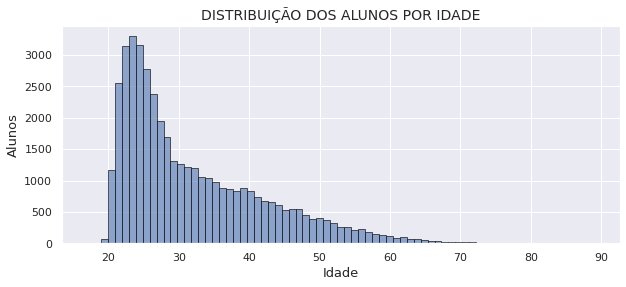

In [ ]:
#Visualizando os alunos pela idade
plt.figure(figsize =(10, 4))
distribuicao_idade = sns.histplot(data=df_aluno, x='IDADE',bins = 73, ec = "k", alpha = .6, palette='crest')
plt.title("DISTRIBUIÇÃO DOS ALUNOS POR IDADE", fontsize=14)
plt.xlabel("Idade", fontsize=13), plt.ylabel('Alunos', fontsize=13)
plt.savefig('idades_alunos.png', transparent = True)

#3.3 Análise do perfil do aluno

In [ ]:
perfil_aluno = df_aluno[['ID_ALUNO','RACA','GENERO','IDADE']]
perfil_aluno.head()

,ID_ALUNO,RACA,GENERO,IDADE
1,1,Parda,Masculino,32
2,2,Parda,Feminino,39
3,3,Parda,Masculino,43
4,4,Parda,Masculino,29
5,5,Branca,Masculino,33


In [ ]:
perfil_genero = perfil_aluno[['GENERO', 'ID_ALUNO']].groupby('GENERO').agg(['count'])
perfil_genero

,ID_ALUNO
,count
GENERO,
Feminino,20554
Masculino,22356


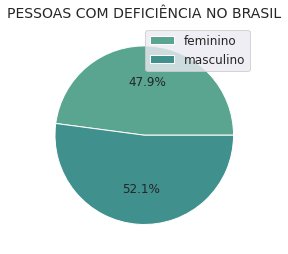

In [ ]:
plt.figure(figsize = (4,10))
brasil = [20554,(22356)]
colors = sns.color_palette("crest")[1:]
labels = 'feminino', 'masculino'
brasil = plt.pie(brasil, colors=colors,autopct='%.1f%%')
plt.legend(loc='best', labels=labels, fontsize='medium')
plt.title("PESSOAS COM DEFICIÊNCIA NO BRASIL", fontsize=14)
plt.savefig('perfil_genero.png', transparent = True)

In [ ]:
perfil_raca = perfil_aluno[['RACA', 'ID_ALUNO']].groupby('RACA').agg(['count'])
perfil_raca

,ID_ALUNO
,count
RACA,
Aluno não quis declarar cor/raça,3845
Amarela,826
Branca,18248
Indígena,273
Não dispõe da informação,76
Parda,15806
Preta,3836


In [ ]:
#Criando o dataframe
df_perfil_raca = pd.DataFrame(perfil_raca['ID_ALUNO']['count'])
df_perfil_raca.reset_index(inplace=True)
df_perfil_raca

,RACA,count
0,Aluno não quis declarar cor/raça,3845
1,Amarela,826
2,Branca,18248
3,Indígena,273
4,Não dispõe da informação,76
5,Parda,15806
6,Preta,3836


In [ ]:
#Renomeando colunas
df_perfil_raca = df_perfil_raca.rename(columns={
    'count':'ALUNOS',
})
df_perfil_raca.head(7)

,RACA,ALUNOS
0,Aluno não quis declarar cor/raça,3845
1,Amarela,826
2,Branca,18248
3,Indígena,273
4,Não dispõe da informação,76
5,Parda,15806
6,Preta,3836


In [ ]:
df_perfil_raca = df_perfil_raca
racas = {
    'Aluno não quis declarar cor/raça':'Não declarado',
    'Não dispõe da informação':'Sem informação',
    'Parda':'Parda',
    'Branca':'Branca',
    'Amarela':'Amarela',
    'Indígena':'Indígena',
    'Preta':'Preta'
}
df_perfil_raca = df_perfil_raca.astype({'RACA':str})
df_perfil_raca.RACA = df_perfil_raca.RACA.map(racas)

In [ ]:
df_perfil_raca_ordenado = df_perfil_raca.sort_values(['ALUNOS'], ascending=False)
df_perfil_raca_ordenado

,RACA,ALUNOS
2,Branca,18248
5,Parda,15806
0,Não declarado,3845
6,Preta,3836
1,Amarela,826
3,Indígena,273
4,Sem informação,76


No handles with labels found to put in legend.


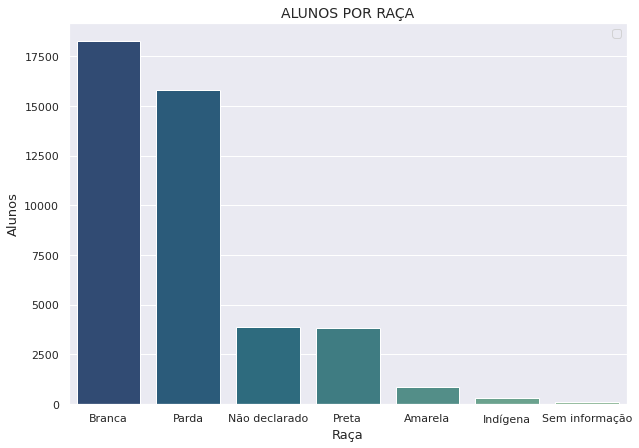

In [ ]:
#Visualizando os alunos pela idade
plt.figure(figsize =(10, 7))
sns.barplot(y=df_perfil_raca_ordenado['ALUNOS'], palette='crest_r', x=df_perfil_raca_ordenado['RACA'])
plt.title("ALUNOS POR RAÇA", fontsize=14)
plt.legend()
plt.xlabel("Raça", fontsize=13), plt.ylabel('Alunos', fontsize=13)
plt.savefig('perfil_raca.png', transparent = True)

No handles with labels found to put in legend.


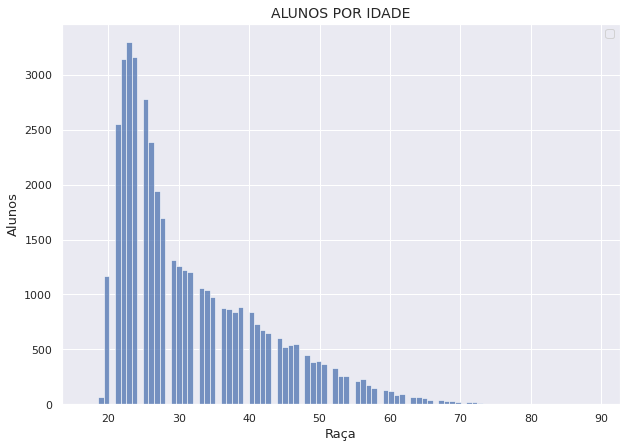

In [ ]:
#Visualizando os alunos pela idade
plt.figure(figsize =(10, 7))
#sns.barplot(y=df_perfil_raca_ordenado['ALUNOS'], palette='crest_r', x=df_perfil_raca_ordenado['RACA'])
sns.histplot(data=perfil_aluno, x='IDADE')
plt.title("ALUNOS POR IDADE", fontsize=14)
plt.legend()
plt.xlabel("Raça", fontsize=13), plt.ylabel('Alunos', fontsize=13)
plt.savefig('perfil_idade.png', transparent = True)

In [ ]:
perfil_aluno.describe()

,ID_ALUNO,IDADE
count,42910.000000,42910.000000
mean,21455.500000,31.655791
std,12387.194362,10.280933
min,1.000000,17.000000
25%,10728.250000,24.000000
50%,21455.500000,28.000000
75%,32182.750000,38.000000
max,42910.000000,89.000000


In [ ]:
#Intervalo de confiança
a = perfil_aluno['IDADE']
mean, sigma = np.mean(a), np.std(a)

conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma)
conf_int

(11.505766622087684, 51.80581575964152)

#3.4 Analisando os alunos que ingressaram na IES sem ser em vagas reservadas para alunos com deficiência

In [ ]:
df_aluno.loc[df_aluno['INGRESSO_RESERVA_DEFICIENCIA'] == 'Não'].count

Podemos perceber que a maioria dos alunos com deficiência matriculados no ensino superior, 63747, ou seja, 95,41% ingressam nos cursos por meio de cotas reservadas a pessoas com deficiência. Apenas 4,59% ingressam ser ser por cotas reservadas.

#3.5 Analisando a quantidade de alunos com deficiência nos cursos

Calculando a quantidade de alunos com deficiência por curso

In [ ]:
#Agrupando os dados de aluno e curso
df_alunos_deficiencia = pd.merge(df_aluno, df_curso, how='inner', on='CODIGO_CURSO')
df_alunos_deficiencia.head()

In [ ]:
#Calculando a quantidade total de alunos por deficiência
IN_DEFICIENCIA_AUDITIVA = df_alunos_deficiencia['IN_DEFICIENCIA_AUDITIVA'].sum()
IN_DEFICIENCIA_FISICA = df_alunos_deficiencia['IN_DEFICIENCIA_FISICA'].sum()
IN_DEFICIENCIA_INTELECTUAL = df_alunos_deficiencia['IN_DEFICIENCIA_INTELECTUAL'].sum()
IN_DEFICIENCIA_MULTIPLA = df_alunos_deficiencia['IN_DEFICIENCIA_MULTIPLA'].sum()
IN_DEFICIENCIA_SURDEZ = df_alunos_deficiencia['IN_DEFICIENCIA_SURDEZ'].sum()
IN_DEFICIENCIA_SURDOCEGUEIRA = df_alunos_deficiencia['IN_DEFICIENCIA_SURDOCEGUEIRA'].sum()
IN_DEFICIENCIA_BAIXA_VISAO = df_alunos_deficiencia['IN_DEFICIENCIA_BAIXA_VISAO'].sum()
IN_DEFICIENCIA_CEGUEIRA = df_alunos_deficiencia['IN_DEFICIENCIA_CEGUEIRA'].sum()
IN_DEFICIENCIA_SUPERDOTACAO = df_alunos_deficiencia['IN_DEFICIENCIA_SUPERDOTACAO'].sum()
IN_TGD_AUTISMO = df_alunos_deficiencia['IN_TGD_AUTISMO'].sum()
IN_TGD_SINDROME_ASPERGER = df_alunos_deficiencia['IN_TGD_SINDROME_ASPERGER'].sum()
IN_TGD_SINDROME_RETT = df_alunos_deficiencia['IN_TGD_SINDROME_RETT'].sum()
IN_TGD_TRANSTOR_DESINTEGRATIVO = df_alunos_deficiencia['IN_TGD_TRANSTOR_DESINTEGRATIVO'].sum()

In [ ]:
#Criando um dicionário, onde cada chave representa uma coluna
tipo_deficiencia = {
'TIPO_DEFICIENCIA': ['IN_DEFICIENCIA_AUDITIVA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA','IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO','IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO','IN_TGD_SINDROME_ASPERGER','IN_TGD_SINDROME_RETT','IN_TGD_TRANSTOR_DESINTEGRATIVO'],
'ALUNOS': [IN_DEFICIENCIA_AUDITIVA, IN_DEFICIENCIA_FISICA, IN_DEFICIENCIA_INTELECTUAL, IN_DEFICIENCIA_MULTIPLA, IN_DEFICIENCIA_SURDEZ, IN_DEFICIENCIA_SURDOCEGUEIRA, IN_DEFICIENCIA_BAIXA_VISAO, IN_DEFICIENCIA_CEGUEIRA, IN_DEFICIENCIA_SUPERDOTACAO, IN_TGD_AUTISMO, IN_TGD_SINDROME_ASPERGER, IN_TGD_SINDROME_RETT, IN_TGD_TRANSTOR_DESINTEGRATIVO],
}
#Criando o dataframe
deficiencias = pd.DataFrame(tipo_deficiencia, columns=['TIPO_DEFICIENCIA','ALUNOS'])
deficiencias

In [ ]:
deficiencias_ordenado = deficiencias.sort_values(['ALUNOS'], ascending=False)
deficiencias_ordenado

In [ ]:
#Visualizando os tipos de deficiência dos alunos em  2019
plt.figure(figsize=(10,6))
defic = sns.barplot(x='ALUNOS', y='TIPO_DEFICIENCIA', data=deficiencias_ordenado, palette='crest_r')
plt.xticks(rotation=90)
defic.set_title('ALUNOS POR TIPO DE DEFICIÊNCIA', fontsize = 14)
defic.set_xlabel('Alunos',fontsize = 13), defic.set_ylabel('Tipos de deficiência',fontsize=13)
plt.savefig('alunos_por_deficiencia.png', transparent = True)

#3.6 Analisando a quantidade de deficientes por grande área de formação

In [ ]:
df_info_curso = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2019.CSV', sep='|', encoding='latin-1', usecols=['NO_CURSO', 'QT_MATRICULA_TOTAL', 'QT_CONCLUINTE_TOTAL'])
df_info_curso['NUM_DE_CURSOS'] = 1
df_info_curso = df_info_curso.groupby('NO_CURSO').sum().reset_index()
df_info_curso = df_info_curso.rename(columns={'NO_CURSO': 'NOME_CURSO', 'QT_MATRICULA_TOTAL': 'NUM_ALUNOS_MATRICULADOS', 'QT_CONCLUINTE_TOTAL': 'NUM_ALUNOS_CONCLUINTES'})
df_info_curso

In [ ]:
df_curso_deficiencia = df_alunos_deficiencia[['NOME_IES', 'NOME_CURSO', 'AREA_FORMACAO']]
df_curso_deficiencia['NUM_ALUNOS_DEFICIENTES'] = 1
df_curso_deficiencia = df_curso_deficiencia.groupby(by=['NOME_CURSO', 'AREA_FORMACAO']).sum().reset_index()
df_curso_deficiencia = pd.merge(df_curso_deficiencia, df_info_curso, how='inner', on='NOME_CURSO')
df_arealuno = df_curso_deficiencia.groupby(by=['AREA_FORMACAO']).sum()
df_arealuno['MEDIA_QNT_ALUNO_CURSO'] = df_arealuno['NUM_ALUNOS_DEFICIENTES'] / df_arealuno['NUM_DE_CURSOS']
df_arealuno

In [ ]:
top10 = df_arealuno.sort_values('MEDIA_QNT_ALUNO_CURSO', ascending=False).reset_index()
plt.figure(figsize=(10,6))
df_arealuno_plot = sns.barplot(x='MEDIA_QNT_ALUNO_CURSO', y='AREA_FORMACAO', data=top10, palette="crest_r")
df_arealuno_plot.set_title('GRANDE ÁREA DE FORMAÇÃO', fontsize = 15)
df_arealuno_plot.set_xlabel('Alunos com deficiência',fontsize = 14), df_arealuno_plot.set_ylabel('Cursos',fontsize=14)
plt.savefig('alunos_por_area_formacao.png', transparent = True)

#3.7 Analisando os recursos de acessibilidade disponíveis por curso

In [ ]:
#Calcular a quantidade de recursos de acessibilidade ofertados por cada curso
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso['RECURSOS'] = df_curso.apply(contar_recursos, axis=1)
df_curso.head()

Filtrando os dados para analisar apenas os cursos que estão "em atividade"


In [ ]:
df_curso = df_curso.loc[df_curso['SITUACAO'] == 'Em atividade']
df_curso.head()

Analisando por quantidade de recursos disponíveis

In [ ]:
area_formacao = df_curso[['AREA_FORMACAO','RECURSOS']].groupby('AREA_FORMACAO').agg(['mean','count'])
area_formacao

In [ ]:
recursos_por_cursos = df_curso[['NOME_CURSO','RECURSOS']].groupby('NOME_CURSO').agg(['mean', 'count'])
recursos_por_cursos

In [ ]:
grau_academico = df_curso[['TIPO_GRAU_ACADEMICO','RECURSOS']].groupby('TIPO_GRAU_ACADEMICO').agg(['mean','count'])
grau_academico

In [ ]:
modalidade_ensino = df_curso[['MODALIDADE_ENSINO','RECURSOS']].groupby('MODALIDADE_ENSINO').agg(['mean','count'])
modalidade_ensino

#3.8 Analisando a correlação entre recursos e alunos com deficiência por curso

In [ ]:
df_recursos = df_curso[['NOME_CURSO', 'RECURSOS']]
df_recursos = df_recursos.groupby('NOME_CURSO').sum().reset_index()
df_recurso_curso = pd.merge(df_curso_deficiencia, df_recursos, how='inner', on='NOME_CURSO')
df_recurso_curso = df_recurso_curso.drop(['AREA_FORMACAO'], axis=1)
df_recurso_curso

In [ ]:
df_recurso_curso.corr()

Percebe-se que existe uma alta correlação entre o numero de alunos com deficiência em relação aos cursos

In [ ]:
df_recurso_curso = df_recurso_curso.sort_values('NUM_ALUNOS_DEFICIENTES', ascending=False)
top10 = df_recurso_curso.head(10)
top10

In [ ]:
plt.figure(figsize=(7,4))
df_recurso_curso_plot = sns.barplot(x='NUM_ALUNOS_DEFICIENTES', y='NOME_CURSO', data=top10, palette="crest_r")
df_recurso_curso_plot.set_title('CURSOS COM MAIS ALUNOS COM DEFICIÊNCIA', fontsize = 15)
df_recurso_curso_plot.set_xlabel('Alunos com deficiência',fontsize = 14), df_recurso_curso_plot.set_ylabel('Cursos',fontsize=14)
plt.savefig('curso_mais_alunos.png', transparent = True)

#3.9 Analisando os tipos de deficiência por IES

In [ ]:
#Filtrando apenas as IES públicas
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso_e_ies_publico = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/df_curso.csv')
df_curso_e_ies_publico = df_curso_e_ies_publico.loc[(df_curso_e_ies_publico['TIPO_CATEGORIA_ADM'] == 'Pública Federal') | (df_curso_e_ies_publico['TIPO_CATEGORIA_ADM'] == 'Pública Estadual') | (df_curso_e_ies_publico['TIPO_CATEGORIA_ADM'] == 'Pública Municipal')]
df_curso_e_ies_publico['RECURSOS'] = df_curso_e_ies_publico.apply(contar_recursos, axis=1)
df_curso_e_ies_publico.head()

In [ ]:
#Calculando a quantidade de alunos com deficiência por IES pública
pcd_ies_publica = df_curso_e_ies_publico.groupby(['SIGLA_IES'])['ALUNOS_COM_DEFICIENCIA'].sum()
pcd_ies_publica

In [ ]:
#Transformando series em dataframe
df_pcd_ies_publica = pd.DataFrame(pcd_ies_publica,columns=['ALUNOS_COM_DEFICIENCIA'])
df_pcd_ies_publica['SIGLA_IES'] = df_pcd_ies_publica.index
df_pcd_ies_publica.index = range(len(df_pcd_ies_publica.index))
df_pcd_ies_publica.sort_values(by='ALUNOS_COM_DEFICIENCIA', ascending=False, inplace=True)

In [ ]:
#Visualizando o dataframe com filtro da UFRPE
df_pcd_ies_publica.loc[df_pcd_ies_publica['SIGLA_IES'] == 'UFRPE']

In [ ]:
#Visualizando 
plt.figure(figsize=(7,4))
pcd_ies_publica_plot = sns.barplot(x='ALUNOS_COM_DEFICIENCIA', y='SIGLA_IES', data=df_pcd_ies_publica.head(10), palette='crest_r')
pcd_ies_publica_plot.set_title('ALUNOS COM DEFICIÊNCIA POR IES', fontsize = 15)
pcd_ies_publica_plot.set_xlabel('IES',fontsize = 14), pcd_ies_publica_plot.set_ylabel('Alunos com deficiência',fontsize=14)
plt.savefig('alunos_por_ies.png', transparent = True)

#3.10 Analisando a quantidade de recursos de acessibilidade por IES

In [ ]:
#Agrupando os recursos disponibilizados por IES
relacao = df_curso.groupby(['SIGLA_IES'])['RECURSOS'].sum().reset_index()
relacao.head()
relacao.loc[relacao['SIGLA_IES'] == 'UFRPE']

In [ ]:
#Transformando em um dataframe
df_recursos_ies = relacao
df_recursos_ies.index = range(len(df_recursos_ies.index))
df_recursos_ies.sort_values(by='RECURSOS', ascending=False, inplace=True)
df_recursos_ies

In [ ]:
#Unindo as informações sobre recursos nas IES

df_recursos = df_recursos_ies.join(df_pcd_ies_publica.set_index('SIGLA_IES'), on='SIGLA_IES')
df_recursos.sort_values(by='ALUNOS_COM_DEFICIENCIA', ascending=False, inplace=True)
df_recursos.head()

In [ ]:
#Visualizando a relação alunos com deficiência e recursos disponíveis pelas IES públicas
plt.figure(figsize=(7,4))
relacao_plot = sns.scatterplot(x='ALUNOS_COM_DEFICIENCIA', y='RECURSOS', data=df_recursos, palette='crest')
relacao_plot.set_title('ALUNOS X RECURSOS DE ACESSIBILIDADE', fontsize = 14)
relacao_plot.set_xlabel('Alunos',fontsize = 13), relacao_plot.set_ylabel('Recursos de Acessibilidade',fontsize=13)
plt.savefig('relacao_alunos_recursos.png', transparent = True)

Pelo gráfico acima percebemos que não conseguimos enxergar uma relação entre a quantidade de recursos ofertados com a quantidades de alunos com deficiência nas IES de ensino público.

In [ ]:
df_a = df_alunos_deficiencia[['NOME_IES']]
df_a['NUM_ALUNOS_DEFICIENTES'] = 1
df_a = df_a.groupby('NOME_IES').sum().reset_index()
df_b = df_curso[['NOME_IES', 'NOME_CURSO', 'NUM_ALUNOS_MATRICULADOS', 'NUM_ALUNOS_CONCLUINTES', 'RECURSOS']]
df_b['NUM_TOTAL_CURSOS'] = 1
df_b = df_b.groupby('NOME_IES').sum().reset_index()
df_recursos_por_ies = pd.merge(df_a, df_b, how='inner', on='NOME_IES')
df_recursos_por_ies
#df_teste

In [ ]:
#Criando grafico de correlação no dataframe de recursos por ies
plt.figure(figsize=(10,4))
corr = df_recursos_por_ies.corr()
ax = sns.heatmap(corr, vmin = -1, vmax = +1, annot = True, cmap = 'crest')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_title('MATRIZ DE CORRELAÇÃO', fontsize = 15)
#ax.set_xlabel('IES',fontsize = 14), ax.set_ylabel('Alunos com deficiência',fontsize=14)
plt.savefig('matriz_correlacao_eda.png', transparent = True)

Percebe-se pelo grafico de correlação que a quantidade de alunos com deficiencia tem uma correlação mediana com a quantidade de recursos oferecidas pelas IES

In [ ]:
#Filtrando apenas as IES públicas
df_curso_publico = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/df_curso.csv')
df_curso_e_ies_publico = df_curso_publico.loc[(df_curso_publico['TIPO_CATEGORIA_ADM'] == 'Pública Municipal') | (df_curso_publico['TIPO_CATEGORIA_ADM'] == 'Pública Federal') | (df_curso_publico['TIPO_CATEGORIA_ADM'] == 'Pública Estadual')]
df_curso_e_ies_publico.head()
#df_curso_publico.loc[(df_curso_publico['TIPO_CATEGORIA_ADM'] == 'Pública Federal') | (df_curso_publico['TIPO_CATEGORIA_ADM'] == 'Pública Estadual') | (df_curso['TIPO_CATEGORIA_ADM'] == 'Pública Municipal')]

In [ ]:
#Calculando a quantidade de alunos com deficiência por IES pública
pcd_ies_publica = df_curso_e_ies_publico.groupby(['SIGLA_IES'])['ALUNOS_COM_DEFICIENCIA'].sum()
pcd_ies_publica

In [ ]:
#Transformando series em dataframe
df_pcd_ies_publica = pd.DataFrame(pcd_ies_publica,columns=['ALUNOS_COM_DEFICIENCIA'])
df_pcd_ies_publica['SIGLA_IES'] = df_pcd_ies_publica.index
df_pcd_ies_publica.index = range(len(df_pcd_ies_publica.index))
df_pcd_ies_publica.sort_values(by='ALUNOS_COM_DEFICIENCIA', ascending=False, inplace=True)

In [ ]:
#Visualizando o dataframe com filtro da UFRPE
df_pcd_ies_publica.loc[df_pcd_ies_publica['SIGLA_IES'] == 'UFRPE']

In [ ]:
#Visualizando 
plt.figure(figsize =(15, 6))
pcd_ies_publica_plot = sns.barplot(x='ALUNOS_COM_DEFICIENCIA', y='SIGLA_IES', data=df_pcd_ies_publica.head(10), palette='crest_r')
pcd_ies_publica_plot.set_title('ALUNOS COM DEFICIÊNCIA POR IES', fontsize = 14)
pcd_ies_publica_plot.set_xlabel('IES',fontsize = 13), pcd_ies_publica_plot.set_ylabel('Alunos com deficiência',fontsize=13)
plt.savefig('alunos_ies.png', transparent = True)



#3.11 Analisando a quantidade de deficientes por categoria administrativa

In [ ]:
#Gráfico categórico Catplot
plt.figure(figsize =(12, 2))
ies_publica_federal = sns.catplot(x='TIPO_CATEGORIA_ADM', y='ALUNOS_COM_DEFICIENCIA', data=df_curso_e_ies_publico, palette='crest')
plt.title("DISTRIBUIÇÃO POR CATEGORIA ADMINISTRATIVA", fontsize=14)
plt.xlabel('Categoria Administrativa', fontsize=13), plt.ylabel('Alunos', fontsize=13)
plt.savefig('alunos_por_categoriaadm.png', transparent = True)

Mas conseguimos perceber que os alunos com deficiência estão mais concentrados nas IES públicas federais.

#3.12 Análise dos alunos concluintes no Ensino Superior

In [ ]:
import pandas as pd
#Importando os dados de concluintes de 2019
alunos_2019 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2019.csv', usecols=['NU_ANO_CENSO','CO_CURSO','CO_ALUNO_CURSO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','IN_CONCLUINTE', 'NU_ANO_INGRESSO'])
alunos_2019 = alunos_2019.loc[alunos_2019['IN_CONCLUINTE'] == 1]
alunos_2019.head()

In [ ]:
#Importando os dados de concluintes de 2018
alunos_2018 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2018.csv', usecols=['NU_ANO_CENSO','CO_CURSO','CO_ALUNO_CURSO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','IN_CONCLUINTE', 'NU_ANO_INGRESSO'])
alunos_2018 = alunos_2018.loc[alunos_2018['IN_CONCLUINTE'] == 1]
alunos_2018.head()

In [ ]:
#Importando os dados de concluintes de 2017
alunos_2017 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2017.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','IN_CONCLUINTE', 'NU_ANO_INGRESSO','NU_ANO_CENSO'])
alunos_2017 = alunos_2017.loc[alunos_2017['IN_CONCLUINTE'] == 1]
alunos_2017.head()

In [ ]:
#Juntando os dados de 2017 a 2019
anos = [alunos_2019, alunos_2018, alunos_2017]
df_concluintes_parcial = pd.concat(anos)
df_concluintes_parcial.head()

In [ ]:
df_concluintes_parcial = df_concluintes_parcial.rename(columns={
    'CO_CURSO':'CODIGO_CURSO',
    'CO_ALUNO_CURSO':'CODIGO_ALUNO_CURSO',
    'TP_COR_RACA':'RACA',
    'TP_SEXO':'GENERO',
    'NU_ANO_NASCIMENTO':'DATA_NASCIMENTO',
    'IN_CONCLUINTE':'CONCLUINTE',
    'NU_ANO_INGRESSO':'ANO_INGRESSO',
    'NU_ANO_CENSO':'ANO_CENSO',
})
df_concluintes_parcial.head()

In [ ]:
#Importando os dados de concluintes de 2016
alunos_2016 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2016.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2016 = alunos_2016.loc[alunos_2016['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2016['NU_ANO_CENSO']=2016
alunos_2016.head()

In [ ]:
#Importando os dados de concluintes de 2015
alunos_2015 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2015.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2015 = alunos_2015.loc[alunos_2015['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2015['NU_ANO_CENSO']=2015
alunos_2015.head()

In [ ]:
#Importando os dados de concluintes de 2014
alunos_2014 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2014.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2014 = alunos_2014.loc[alunos_2014['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2014['NU_ANO_CENSO']=2014
alunos_2014.head()

In [ ]:
#Importando os dados de concluintes de 2013
alunos_2013 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2013.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2013 = alunos_2013.loc[alunos_2013['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2013['NU_ANO_CENSO']=2013
alunos_2013.head()

In [ ]:
#Importando os dados de concluintes de 2012
alunos_2012 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2012.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2012 = alunos_2012.loc[alunos_2012['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2012['NU_ANO_CENSO']=2012
alunos_2012.head()

In [ ]:
#Importando os dados de concluintes de 2011
alunos_2011 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2011.csv', usecols=['CO_CURSO','CO_ALUNO_CURSO', 'CO_COR_RACA_ALUNO','IN_SEXO_ALUNO','NU_ANO_ALUNO_NASC','IN_CONCLUINTE', 'ANO_INGRESSO'])
alunos_2011 = alunos_2011.loc[alunos_2011['IN_CONCLUINTE'] == 1]
#Adicionar coluna com ano do censo 'NU_ANO_CENSO'
alunos_2011['NU_ANO_CENSO']=2011
alunos_2011.head()

In [ ]:
#Juntando os dados de todos os anos
anos_parcial_2 = [alunos_2016, alunos_2015, alunos_2014, alunos_2013, alunos_2012, alunos_2011]
df_concluintes_parcial_2 = pd.concat(anos_parcial_2)
df_concluintes_parcial_2

In [ ]:
df_concluintes_parcial_2 = df_concluintes_parcial_2.rename(columns={
    'CO_CURSO':'CODIGO_CURSO',
    'CO_ALUNO_CURSO':'CODIGO_ALUNO_CURSO',
    'CO_COR_RACA_ALUNO':'RACA',
    'IN_SEXO_ALUNO':'GENERO',
    'NU_ANO_ALUNO_NASC':'DATA_NASCIMENTO',
    'IN_CONCLUINTE':'CONCLUINTE',
    'NU_ANO_INGRESSO':'ANO_INGRESSO',
    'NU_ANO_CENSO':'ANO_CENSO',
})
df_concluintes_parcial_2.head()

In [ ]:
#Juntando os dados de todos os anos
partes = [df_concluintes_parcial,df_concluintes_parcial_2]
df_concluintes = pd.concat(partes)
df_concluintes.head()

In [ ]:
#Substituindo o código pela raça
raca = {
    '0':'Aluno não quis declarar cor/raça',   
    '1':'Branca',
    '2':'Preta',
    '3':'Parda',
    '4':'Amarela',
    '5':'Indígena',
    '9':'Não dispõe da informação',
}
df_concluintes = df_concluintes.astype({'RACA':str})
df_concluintes.RACA = df_concluintes.RACA.map(raca)
df_concluintes.head()

In [ ]:
#Substituindo código por gênero
genero = {
    '1':'Feminino',
    '2':'Masculino',
}
df_concluintes = df_concluintes.astype({'GENERO':str})
df_concluintes.GENERO = df_concluintes.GENERO.map(genero)
df_concluintes.head()

In [ ]:
#Inserindo a coluna Idade
df_concluintes['IDADE']=2021-df_concluintes['DATA_NASCIMENTO']
df_concluintes.head()

In [ ]:
#Inserindo o tempo de conclusão
df_concluintes = df_concluintes.rename(columns={'CONCLUINTE':'CONCLUSÃO'})
df_concluintes['CONCLUSÃO']=df_concluintes['ANO_CENSO']
df_concluintes['TEMPO_CONCLUSÃO']=df_concluintes['CONCLUSÃO']-df_concluintes['ANO_INGRESSO']+1
df_concluintes.head()

In [ ]:
df_concluintes.describe()

In [ ]:
#Somando os concluintes por ano
df_concluintes_por_ano = pd.DataFrame(columns=['ANO_CENSO'])
df_concluintes_por_ano['ANO_CENSO'] = df_concluintes['ANO_CENSO'].unique()
df_concluintes_por_ano

In [ ]:
def contar_concluintes(row):
  df_concluintes_no_ano = df_concluintes.loc[df_concluintes['ANO_CENSO'] == row['ANO_CENSO']]
  row['CONCLUINTES'] = len(df_concluintes_no_ano.index)
  row['MEDIA_IDADE'] = df_concluintes_no_ano['IDADE'].mean()
  row['TEMPO_MEDIO']  = df_concluintes_no_ano['TEMPO_CONCLUSÃO'].mean()
  return row
df_concluintes_por_ano = df_concluintes_por_ano.apply(contar_concluintes, axis=1)
df_concluintes_por_ano = df_concluintes_por_ano.astype({'ANO_CENSO':int})
df_concluintes_por_ano = df_concluintes_por_ano.astype({'CONCLUINTES':int})
df_concluintes_por_ano

In [ ]:
total_matriculados = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/total_matriculados.csv')
total_matriculados.head()

In [ ]:
df_concluintes_por_ano = df_concluintes_por_ano.join(total_matriculados[['ANO','ALUNO COM DEFICIENCIA']].set_index('ANO'), on='ANO_CENSO')

In [ ]:
df_concluintes_por_ano = df_concluintes_por_ano.reindex(index=df_concluintes_por_ano.index[::-1])
df_concluintes_por_ano

In [ ]:
df_concluintes_por_ano['PORCENTAGEM_CONCLUINTES'] = df_concluintes_por_ano['CONCLUINTES']/df_concluintes_por_ano['ALUNO COM DEFICIENCIA'] * 100
df_concluintes_por_ano

In [ ]:
plt.figure(figsize =(10, 4))
pcd_ies_publica_plot = sns.barplot(x='ANO_CENSO', y='MEDIA_IDADE', data=df_concluintes_por_ano, palette='crest')
#pcd_ies_publica_plot.set_title('ALUNOS COM DEFICIÊNCIA POR IES', fontsize = 14)
pcd_ies_publica_plot.set_xlabel('Ano',fontsize = 13), pcd_ies_publica_plot.set_ylabel('Idade Média dos Alunos',fontsize=13)
plt.savefig('concluintes.png', transparent = True)

In [ ]:
plt.figure(figsize =(10, 4))
pcd_ies_publica_plot = sns.barplot(x='ANO_CENSO', y='TEMPO_MEDIO', data=df_concluintes_por_ano, palette='crest')
pcd_ies_publica_plot.set_title('TEMPO DE CURSO', fontsize = 14)
pcd_ies_publica_plot.set_xlabel('Ano',fontsize = 13), pcd_ies_publica_plot.set_ylabel('Tempo Médio do Curso',fontsize=13)
plt.savefig('tempo_curso.png', transparent = True)

In [ ]:
plt.figure(figsize =(10, 4))
pcd_ies_publica_plot = sns.barplot(x='ANO_CENSO', y='PORCENTAGEM_CONCLUINTES', data=df_concluintes_por_ano, palette='crest')
pcd_ies_publica_plot.set_title('CONCLUINTES', fontsize = 14)
pcd_ies_publica_plot.set_xlabel('Ano',fontsize = 13), pcd_ies_publica_plot.set_ylabel('Concluintes (%)',fontsize=13)
plt.savefig('concluintes.png', transparent = True)

#3.13 Analisando deficiências e recursos

In [ ]:
df_alunos_deficiencia.head(3)

In [ ]:
#Renomeando colunas
df_alunos_deficiencia = df_alunos_deficiencia.rename(columns={
    'CODIGO_IES_x':'CODIGO_IES',
    'IN_DEFICIENCIA_AUDITIVA':'ALUNOS_COM_DEFICIENCIA_AUDITIVA',
    'IN_DEFICIENCIA_FISICA':'ALUNOS_COM_DEFICIENCIA_FISICA',
    'IN_DEFICIENCIA_INTELECTUAL':'ALUNOS_COM_DEFICIENCIA_INTELECTUAL',
    'IN_DEFICIENCIA_MULTIPLA':'ALUNOS_COM_DEFICIENCIA_MULTIPLA',
    'IN_DEFICIENCIA_SURDEZ':'ALUNOS_COM_SURDEZ',
    'IN_DEFICIENCIA_SURDOCEGUEIRA':'ALUNOS_COM_SURDOCEGUEIRA',
    'IN_DEFICIENCIA_BAIXA_VISAO':'ALUNOS_COM_BAIXA_VISAO',
    'IN_DEFICIENCIA_CEGUEIRA':'ALUNOS_COM_CEGUEIRA',
    'IN_DEFICIENCIA_SUPERDOTACAO':'ALUNOS_COM_SUPERDOTACAO',
    'IN_TGD_AUTISMO':'ALUNOS_COM_TGD_AUTISMO',
    'IN_TGD_SINDROME_ASPERGER':'ALUNOS_COM_TGD_SINDROME_ASPERGER',
    'IN_TGD_SINDROME_RETT':'ALUNOS_COM_TGD_SINDROME_RETT',
    'IN_TGD_TRANSTOR_DESINTEGRATIVO':'ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO'
    })
df_alunos_deficiencia.head(5)

#Deficiências

In [ ]:
df_alunos_deficiencia.head(3)

In [ ]:
df_alunos_deficiencia = df_alunos_deficiencia[['CODIGO_IES','TIPO_CATEGORIA_ADM','REGIAO','UF','CODIGO_CURSO','NOME_IES','SIGLA_IES','ALUNOS_COM_DEFICIENCIA_AUDITIVA','ALUNOS_COM_DEFICIENCIA_FISICA','ALUNOS_COM_DEFICIENCIA_INTELECTUAL','ALUNOS_COM_DEFICIENCIA_MULTIPLA','ALUNOS_COM_SURDEZ','ALUNOS_COM_SURDOCEGUEIRA','ALUNOS_COM_BAIXA_VISAO','ALUNOS_COM_CEGUEIRA','ALUNOS_COM_SUPERDOTACAO','ALUNOS_COM_TGD_AUTISMO','ALUNOS_COM_TGD_SINDROME_ASPERGER','ALUNOS_COM_TGD_SINDROME_RETT','ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO','MATERIAL_DIGITAL','MATERIAL_AMPLIADO','MATERIAL_TATIL','MATERIAL_IMPRESSO','MATERIAL_AUDIO','MATERIAL_BRAILLE','MATERIAL_LIBRAS','DISCIPLINA_LIBRAS','TRADUTOR_LIBRAS','GUIA_INTERPRETE','RECURSOS_COMUNICACAO','RECURSOS_INFORMATICA']]
df_alunos_deficiencia.head(3)

In [ ]:
#Alunos com deficiênca física
df_alunos_deficiencia['DEFICIENCIA_FISICA'] = df_alunos_deficiencia['ALUNOS_COM_DEFICIENCIA_FISICA']
df_alunos_deficiencia.head(3)

In [ ]:
#Agrupando as deficiêncas auditivas do aluno
def def_auditiva(row):
  return row['ALUNOS_COM_DEFICIENCIA_AUDITIVA'] + row['ALUNOS_COM_SURDEZ'] + row['ALUNOS_COM_SURDOCEGUEIRA']

df_alunos_deficiencia['DEFICIENCIA_AUDITIVA'] = df_alunos_deficiencia.apply(def_auditiva, axis=1)
df_alunos_deficiencia.fillna(0, inplace = True)
df_alunos_deficiencia.head(3)

In [ ]:
#Agrupando as deficiêncas visuais do aluno
def def_visual(row):
  return row['ALUNOS_COM_BAIXA_VISAO'] + row['ALUNOS_COM_CEGUEIRA'] + row['ALUNOS_COM_SURDOCEGUEIRA']

df_alunos_deficiencia['DEFICIENCIA_VISUAL'] = df_alunos_deficiencia.apply(def_visual, axis=1)
df_alunos_deficiencia.fillna(0, inplace = True)
df_alunos_deficiencia.head(3)

In [ ]:
#Agrupando as deficiêncas cognitivas do aluno
def def_cognitiva(row):
  return row['ALUNOS_COM_DEFICIENCIA_INTELECTUAL'] + row['ALUNOS_COM_SUPERDOTACAO'] + row['ALUNOS_COM_TGD_AUTISMO'] + row['ALUNOS_COM_TGD_SINDROME_ASPERGER'] + row['ALUNOS_COM_TGD_SINDROME_RETT'] + row['ALUNOS_COM_TGD_TRANSTOR_DESINTEGRATIVO']

df_alunos_deficiencia['DEFICIENCIA_COGNITIVA'] = df_alunos_deficiencia.apply(def_cognitiva, axis=1)
df_alunos_deficiencia.fillna(0, inplace = True)
df_alunos_deficiencia.head(3)

In [ ]:
#Agrupando as deficiêncas múltiplas do aluno
def def_mutipla(row):
  return row['ALUNOS_COM_DEFICIENCIA_MULTIPLA'] + row['ALUNOS_COM_SURDOCEGUEIRA']

df_alunos_deficiencia['DEFICIENCIA_MULTIPLA'] = df_alunos_deficiencia.apply(def_mutipla, axis=1)
df_alunos_deficiencia.fillna(0, inplace = True)
df_alunos_deficiencia.head(3)

In [ ]:
df_classes = df_alunos_deficiencia[['CODIGO_IES','TIPO_CATEGORIA_ADM','REGIAO','UF']].drop_duplicates()
df_classes.head()

In [ ]:
df_classes = df_classes.set_index('CODIGO_IES')
df_classes.head()

In [ ]:
df_alunos_deficiencia.head()

In [ ]:
#df_ies_deficiencia = df_alunos_deficiencia[['CODIGO_IES','CODIGO_CURSO','DEFICIENCIA_FISICA','DEFICIENCIA_AUDITIVA','DEFICIENCIA_VISUAL','DEFICIENCIA_COGNITIVA','DEFICIENCIA_MULTIPLA']]
#df_ies_deficiencia.head(3)

#Recursos

In [ ]:
df_deficiencias_e_recursos = df_alunos_deficiencia[['CODIGO_IES','CODIGO_CURSO','MATERIAL_DIGITAL','MATERIAL_AMPLIADO','MATERIAL_TATIL','MATERIAL_IMPRESSO','MATERIAL_AUDIO','MATERIAL_BRAILLE','MATERIAL_LIBRAS','DISCIPLINA_LIBRAS','TRADUTOR_LIBRAS','GUIA_INTERPRETE','RECURSOS_COMUNICACAO','RECURSOS_INFORMATICA']]
df_deficiencias_e_recursos.head(3)

In [ ]:
#Agrupando os recursos referentes às necessidades de alunos com deficiência física
def recurso_def_fisica(row):
  return row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA'] + row['MATERIAL_DIGITAL']  + row['MATERIAL_IMPRESSO']

df_deficiencias_e_recursos['RECURSOS_DEF_FISICA'] = df_deficiencias_e_recursos.apply(recurso_def_fisica, axis=1)
df_deficiencias_e_recursos.fillna(0, inplace = True)
df_deficiencias_e_recursos.head(3)

In [ ]:
#Agrupando os recursos referentes às necessidades de alunos com deficiências visuais
def recurso_def_visual(row):
  return row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA'] + row['MATERIAL_DIGITAL']  + row['MATERIAL_IMPRESSO']

df_deficiencias_e_recursos['RECURSOS_DEF_VISUAL'] = df_deficiencias_e_recursos.apply(recurso_def_visual, axis=1)
df_deficiencias_e_recursos.fillna(0, inplace = True)
df_deficiencias_e_recursos.head(3)

In [ ]:
#Agrupando os recursos referentes às necessidades de alunos com deficiência auditiva
def recurso_def_auditiva(row):
  return row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA'] + row['MATERIAL_DIGITAL']  + row['MATERIAL_IMPRESSO'] 

df_deficiencias_e_recursos['RECURSOS_DEF_AUDITIVA'] = df_deficiencias_e_recursos.apply(recurso_def_auditiva, axis=1)
df_deficiencias_e_recursos.fillna(0, inplace = True)
df_deficiencias_e_recursos.head(3)

In [ ]:
#Agrupando os recursos referentes às necessidades de alunos com deficiência cognitiva
def recurso_def_cognitiva(row):
  return row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA'] + row['MATERIAL_DIGITAL']  + row['MATERIAL_IMPRESSO']

df_deficiencias_e_recursos['RECURSOS_DEF_COGNITIVA'] = df_deficiencias_e_recursos.apply(recurso_def_cognitiva, axis=1)
df_deficiencias_e_recursos.fillna(0, inplace = True)
df_deficiencias_e_recursos.head(3)

In [ ]:
#Agrupando os recursos referentes às necessidades de alunos com deficiência múltipla
def recurso_def_multipla(row):
  return row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA'] + row['MATERIAL_DIGITAL']  + row['MATERIAL_IMPRESSO']

df_deficiencias_e_recursos['RECURSOS_DEF_MULTIPLA'] = df_deficiencias_e_recursos.apply(recurso_def_multipla, axis=1)
df_deficiencias_e_recursos.fillna(0, inplace = True)
df_deficiencias_e_recursos.head(3)

In [ ]:
df_recursos = df_deficiencias_e_recursos
df_recursos.head(3)

Juntando todas as informações por curso

In [ ]:
df_deficiencias = df_alunos_deficiencia[['CODIGO_IES','CODIGO_CURSO','DEFICIENCIA_FISICA','DEFICIENCIA_AUDITIVA','DEFICIENCIA_VISUAL','DEFICIENCIA_COGNITIVA','DEFICIENCIA_MULTIPLA']]
df_deficiencias.head(3)

In [ ]:
#Agrupando alunos com deficiência por curso e ies
df_deficiencias_agrupado = df_deficiencias.groupby(['CODIGO_CURSO','CODIGO_IES']).sum()
df_deficiencias_agrupado.reset_index(inplace=True)
df_deficiencias_agrupado.head(5)

In [ ]:
df_recursos.drop_duplicates('CODIGO_CURSO')

In [ ]:
#Agrupando alunos com deficiência por curso
df_recursos_agrupado = df_recursos.drop_duplicates('CODIGO_CURSO')
df_recursos_agrupado.head(5)

In [ ]:
df_recursos_agrupado = df_recursos_agrupado[['CODIGO_IES','CODIGO_CURSO','RECURSOS_DEF_FISICA','RECURSOS_DEF_VISUAL','RECURSOS_DEF_AUDITIVA','RECURSOS_DEF_COGNITIVA','RECURSOS_DEF_MULTIPLA']]
df_recursos_agrupado.head(3)

In [ ]:
#Join aluno e recurso
df_deficiencias_e_recursos = df_deficiencias_agrupado.join(df_recursos_agrupado.set_index(['CODIGO_IES','CODIGO_CURSO']), on=['CODIGO_IES','CODIGO_CURSO'])
df_deficiencias_e_recursos.head(3)

In [ ]:
#Agrupando por IES
df_ies_agrupado = df_deficiencias_e_recursos.drop(columns='CODIGO_CURSO').groupby('CODIGO_IES').sum().reset_index()
df_ies_agrupado

In [ ]:
#Unindo com as informações sobre IES
df_dados_ies = df_classes.reset_index().join(df_ies_agrupado.set_index('CODIGO_IES'), on='CODIGO_IES')
df_dados_ies.head()

In [ ]:
df_dados_ies = df_cursos_por_ies.join(df_dados_ies.set_index('CODIGO_IES'), on='CODIGO_IES')
df_dados_ies.head()

In [ ]:
df_dados_ies.loc[df_dados_ies['NUM_CURSOS'] > 200]

In [ ]:
#Calculando a média dos recursos
df_dados_ies['RECURSOS_DEF_FISICA'] = df_dados_ies['RECURSOS_DEF_FISICA']/ df_dados_ies['NUM_CURSOS'] 
df_dados_ies['RECURSOS_DEF_VISUAL'] = df_dados_ies['RECURSOS_DEF_VISUAL']/ df_dados_ies['NUM_CURSOS'] 
df_dados_ies['RECURSOS_DEF_AUDITIVA'] = df_dados_ies['RECURSOS_DEF_AUDITIVA']/ df_dados_ies['NUM_CURSOS'] 
df_dados_ies['RECURSOS_DEF_COGNITIVA'] = df_dados_ies['RECURSOS_DEF_COGNITIVA']/ df_dados_ies['NUM_CURSOS'] 
df_dados_ies['RECURSOS_DEF_MULTIPLA'] = df_dados_ies['RECURSOS_DEF_MULTIPLA']/ df_dados_ies['NUM_CURSOS'] 
df_dados_ies.head()

In [ ]:
df_dados_ies.describe()

In [ ]:
df_dados_ies.loc[df_dados_ies['RECURSOS_DEF_FISICA'] > 200]

Analisando a correlação entre os dados

In [ ]:
df_dados_ies.corr()

In [ ]:
plt.figure(figsize =(15, 6))
sns.heatmap(df_dados_ies.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'crest', linecolor='white', xticklabels='auto', yticklabels='auto')
plt.tick_params(axis='x', rotation=25)
plt.title("MATRIZ DE CORRELAÇÃO", fontsize=14)
plt.savefig('matriz_correlacao_def_recursos.png', transparent = True)

In [ ]:
#Exportando o dataframe para um arquivo csv
df_dados_ies.to_csv('dados_ies.csv',sep=',', encoding='latin1')